In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
sentiment = pd.read_csv('fear_greed_index.csv')
sentiment.head()

trades = pd.read_csv("historical_data.csv")
trades.head()


/tmp/ipython-input-1938764132.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades = pd.read_csv("historical_data.csv")


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [20]:
import os
os.listdir()


['.config',
 'sample_data',
 'drive',
 'fear_greed_index.csv',
 'historical_data.csv']

In [23]:
# Convert sentiment 'date' column
sentiment['Date'] = pd.to_datetime(sentiment['date']).dt.date

sentiment[['date', 'Date']].head()


,date,Date
0,2018-02-01,2018-02-01
1,2018-02-02,2018-02-02
2,2018-02-03,2018-02-03
3,2018-02-04,2018-02-04
4,2018-02-05,2018-02-05


In [25]:
trades.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [27]:
# Convert Timestamp IST with correct date format
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)

# Extract Date
trades['Date'] = trades['Timestamp IST'].dt.date

trades[['Timestamp IST', 'Date']].head()


,Timestamp IST,Date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [28]:
# Merge trades with sentiment on Date
merged = trades.merge(
    sentiment[['Date', 'classification']],
    on='Date',
    how='left'
)

merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [29]:
merged = merged.dropna(subset=['classification'])

merged.shape


(46476, 18)

In [30]:
# Save merged dataset
merged.to_csv("merged_data.csv", index=False)


In [22]:
sentiment.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [31]:
# Average profit by market sentiment
profit_by_sentiment = merged.groupby('classification')['Closed PnL'].mean()
profit_by_sentiment


,Closed PnL
classification,
Extreme Fear,204.336799
Extreme Greed,162.746010
Fear,146.672879
Greed,92.228518
Neutral,86.191512


In [32]:
# Average fee as a proxy for trading intensity (risk)
risk_by_sentiment = merged.groupby('classification')['Fee'].mean()
risk_by_sentiment


,Fee
classification,
Extreme Fear,2.417201
Extreme Greed,1.925257
Fear,4.031800
Greed,3.169096
Neutral,3.039157


In [33]:
# Trade size in USD vs sentiment
volume_by_sentiment = merged.groupby('classification')['Size USD'].mean()
volume_by_sentiment


,Size USD
classification,
Extreme Fear,9791.737211
Extreme Greed,8167.955020
Fear,23119.389312
Greed,14226.886005
Neutral,13987.707452


In [34]:
merged['win'] = merged['Closed PnL'] > 0
winrate_by_sentiment = merged.groupby('classification')['win'].mean()
winrate_by_sentiment


,win
classification,
Extreme Fear,0.404926
Extreme Greed,0.536932
Fear,0.445022
Greed,0.411315
Neutral,0.479061


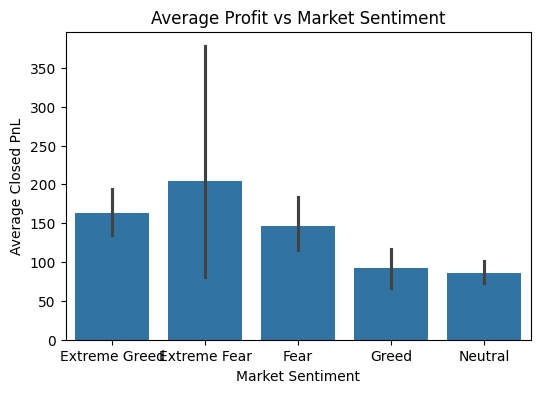

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='Closed PnL', data=merged)
plt.title("Average Profit vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")

# SAVE IMAGE
plt.savefig("profit_vs_sentiment.png")
plt.show()


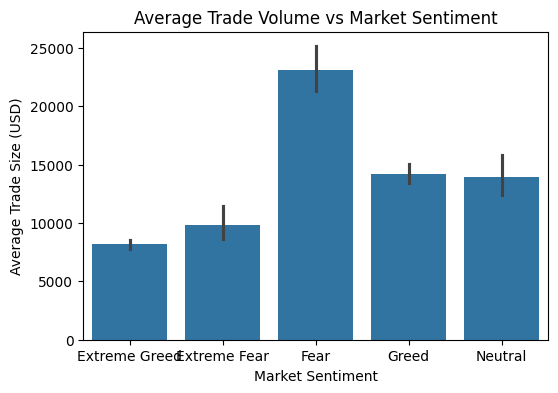

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='Size USD', data=merged)
plt.title("Average Trade Volume vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")

# SAVE IMAGE
plt.savefig("volume_vs_sentiment.png")
plt.show()


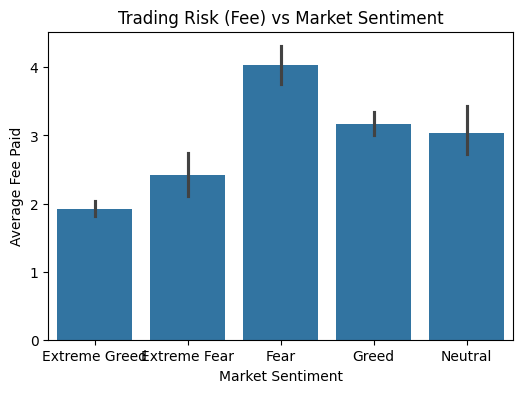

In [37]:
plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='Fee', data=merged)
plt.title("Trading Risk (Fee) vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Fee Paid")

# SAVE IMAGE
plt.savefig("risk_vs_sentiment.png")
plt.show()
